In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.set_option("display.max_columns",None)

## 1) Problem Statement

- Forcasting insurance policy that will lapse

## 2) Data Gathering

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


## 3) EDA / DQ Check

>> INSIGHTS
- Shape:-
- Rows count - 79853
- columns count - 13
-----------------------------------------------------------------------------------------
- Informaton:-
- int column - 6
- float column - 5
- object column - 2
- There is 11 - munerical column & 2 - categorical column
-----------------------------------------------------------------------------------------
- Unique value of categorical columns & Value counts:-
- a) sourcing_channel
        A    43134
        B    16512
        C    12039
        D     7559
        E      609
- In sourcing_channel column we do replace 
- b) residence_area_type:-
        Urban    48183
        Rural    31670
- In resicance_area_type column we do OneHotEncoding
-------------------------------------------------------------------------------------------        
- Finding missing value:-
- a) Count_3-6_months_late - count of missing value(97) - percentage(0.121473)
- b) Count_6-12_months_late - count of  missing value(97) - percentage(0.121473)
- c) Count_more_than_12_months_late - count of missing value(97) - percentage(0.121473)
- d) application_underwriting_score  - count of missing value(2974) - percentage(3.724343)
- ########################################################################################
- There are 73 rows having NaN value above these 4 columns simultaneously
------------------------------------------------------------------------------------------
- Outliers Present in columns:-
- a) age_in_days
- b) premium
-------------------------------------------------------------------------------------------
- How many numerical colum present in df >  11 columns
- Numeric columns are > ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days','Income','Count_36_months_late','Count_612_months_late',
'Count_more_than_12_months_late', 'application_underwriting_score',
'no_of_premiums_paid', 'premium', 'target']

-------------------------------------------------------------------------------------------
- How many categorical columns present in df >> 2 columns
- Categorical columns are > ['sourcing_channel', 'residence_area_type']

## ----------------------------------------------------------------------------------------------------------------------

In [3]:
df.shape

(79853, 13)

In [4]:
df.isna().mean()*100

id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
Income                              0.000000
Count_3-6_months_late               0.121473
Count_6-12_months_late              0.121473
Count_more_than_12_months_late      0.121473
application_underwriting_score      3.724343
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
premium                             0.000000
target                              0.000000
dtype: float64

In [5]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [6]:
df[(df["Count_3-6_months_late"].isnull()) & (df["Count_6-12_months_late"].isnull()) &
   (df["Count_more_than_12_months_late"].isnull()) & 
   (df["application_underwriting_score"].isnull())]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
158,73099,1.0,15336,210100,NaN,NaN,NaN,NaN,2,A,Urban,9600,0
1216,81690,1.0,7679,39040,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
1471,49862,1.0,10593,49520,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
3092,59,1.0,17891,90100,NaN,NaN,NaN,NaN,2,A,Urban,5700,1
4177,19184,1.0,18260,40530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73098,109871,1.0,9866,81120,NaN,NaN,NaN,NaN,2,A,Urban,1200,0
73623,50356,1.0,16431,108030,NaN,NaN,NaN,NaN,2,A,Urban,7500,0
73733,90421,1.0,10232,42150,NaN,NaN,NaN,NaN,2,A,Rural,1200,1
75360,66964,1.0,21545,65530,NaN,NaN,NaN,NaN,2,A,Rural,1200,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  targ

In [8]:
lst = ["sourcing_channel","residence_area_type"]
for i in lst:
    print(df[i].value_counts())
    print("*"*50)

sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64
**************************************************
residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64
**************************************************


In [9]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [10]:
df.corr(numeric_only=True)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,0.003430,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.067523,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.074070,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.302825,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.001086,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.043794,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.023615,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.135078,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.191889,0.022664
premium,0.003430,-0.067523,0.074070,0.302825,-0.001086,-0.043794,-0.023615,0.135078,0.191889,1.000000,0.036416


In [11]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')

<AxesSubplot:xlabel='perc_premium_paid_by_cash_credit', ylabel='Income'>

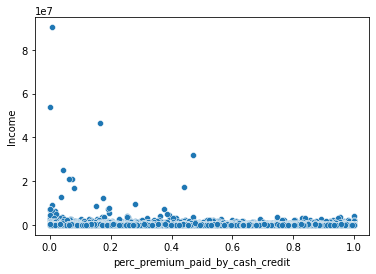

In [12]:
sns.scatterplot(x = df["perc_premium_paid_by_cash_credit"],y = df["Income"])

<AxesSubplot:>

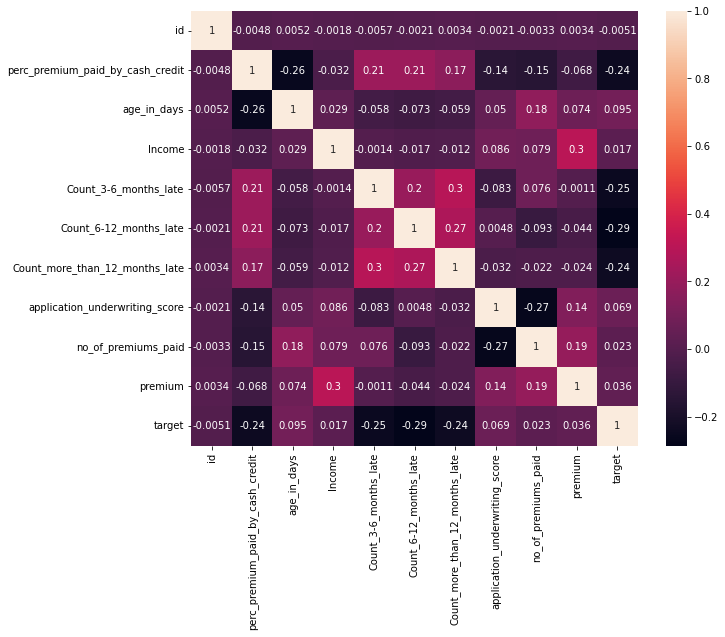

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [14]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


- Outliers Present in columns:-
- a) age_in_days
- b) premium

<AxesSubplot:xlabel='age_in_days'>

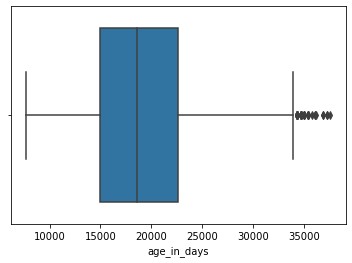

In [15]:
sns.boxplot(df["age_in_days"])

<AxesSubplot:xlabel='premium'>

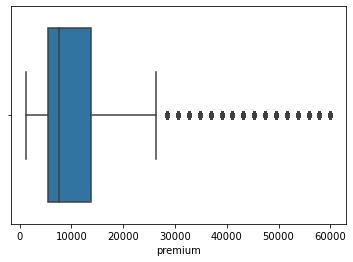

In [16]:
sns.boxplot(df["premium"])

In [17]:
df._get_numeric_data()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1
...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,5700,1


In [18]:
df._get_numeric_data().columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'target'],
      dtype='object')

- How many categorical columns present in df >> 2 columns
- Categorical columns are > ['sourcing_channel', 'residence_area_type']

In [19]:
df.select_dtypes(include="object")

,sourcing_channel,residence_area_type
0,C,Urban
1,A,Urban
2,C,Rural
3,A,Urban
4,B,Urban
...,...,...
79848,B,Urban
79849,A,Rural
79850,A,Rural
79851,A,Rural


In [20]:
df.select_dtypes(include="object").columns

Index(['sourcing_channel', 'residence_area_type'], dtype='object')

In [21]:
df._get_numeric_data().columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'target'],
      dtype='object')

In [22]:
lst= ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'target']
for i in lst:
    print(df[i].value_counts())
    print("*"*50)

perc_premium_paid_by_cash_credit
0.000    5723
1.000    5004
0.001     698
0.002     612
0.003     551
         ... 
0.640      19
0.869      17
0.759      17
0.851      16
0.742      15
Name: count, Length: 1001, dtype: int64
**************************************************
age_in_days
17899    226
16802    223
17895    219
17163    217
16801    216
        ... 
34317      1
36870      1
34320      1
7690       1
34318      1
Name: count, Length: 833, dtype: int64
**************************************************
Income
150130    171
150060    162
150090    158
150120    157
150050    154
         ... 
173940      1
28920       1
261800      1
152940      1
39330       1
Name: count, Length: 24165, dtype: int64
**************************************************
Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: 

In [23]:
lst1 = ['sourcing_channel', 'residence_area_type']
for col in lst1:
    print(df[col].value_counts())
    print("*"*50)

sourcing_channel
A    43134
B    16512
C    12039
D     7559
E      609
Name: count, dtype: int64
**************************************************
residence_area_type
Urban    48183
Rural    31670
Name: count, dtype: int64
**************************************************
